# RNNIP WPs

**Goal:** Judith asked me what were the WPs that I used for the retraining campaign, so I'm j going to try to get them rn!!

In [1]:
import numpy as np
import h5py
import sys
import pandas as pd
import xarray as xr

sys.path.append("../..")
from usefulFcts import *
from trainNet import *
from plottingFcts import *

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be u

In [5]:
physicsSample = 'ttbar'

subDir = f'mc16d_PFlow_{physicsSample}'
dataDir = '../../data/'+subDir
vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"
dataTagTest = "2mtest_15trks_{}_sd0_rev_hybrid_5TeV_scale".format(vStr)

f_name = "{}/data_{}.hdf5".format(dataDir,dataTagTest)

f = h5py.File(f_name,"r")
    
X = f['X_test'][:]
y = f['y_test'][:]
ix = f['ix_test'][:]

f.close()

In [14]:
Ntrain = int(5e6)
trainPhysicsSample = 'hybrid_5TeV'
nFeatures = 13
nHidden = 400

# Also open the df so that you'll have access to the jet pt and eta
df_tag = '2mtest_15trks_sd0_rev'
jet_df = pd.read_hdf('{}/jet_{}.h5'.format(dataDir,df_tag), key='jet_df')

# Load in the model
modelDir = "../../models/mc16d_PFlow_"+trainPhysicsSample
dataTagTrain = "{}train_15trks_{}_sd0_rev".format(nJetsTag(Ntrain),vStr)
m = myLSTM(modelDir=modelDir, nFeatures=nFeatures, nHidden=nHidden, dataTag=dataTagTrain, loadModel=True)

# Get the efficiencies
# tag = '_eval_{}'.format(physicsSample) if physicsSample != trainPhysicsSample else ''
# (leff, ceff, beff), d = getEffs(m, X, y, ix, returnDisc=True)#,
#                                 #figDir='',subDir=subDir,modelDir=modelDir,tag='test')

Initialize method from myModel()
Loading previously trained LSTM


In [112]:
# (leff, ceff, beff), d = getEffs(m, X, y, ix, returnDisc=True)

In [ ]:
(leff2, ceff2, beff2), d_p018 = getEffs(m, X, y, ix, returnDisc=True,fc=0.018)

In [109]:
?getEffs

In [16]:
ps = m.eval(X)

In [28]:
np.max(ps[:,-1])

3.937143e-05

In [29]:
fc = 0.07
d = np.log(ps[:,2] / (fc*ps[:,1] + (1 - fc) * ps[:,0]))


In [30]:
fc = 0.018
d_p018 = np.log(ps[:,2] / (fc*ps[:,1] + (1 - fc) * ps[:,0]))



In [36]:
wps = pd.DataFrame(0, [85,77,70,60],[f'fc = {fc}' for fc in [0.07,0.018]])

In [60]:
jet_df.head()

LabDr_HadF     pt_orig  eta_orig  phi_orig          m  ip3d_llr   ip3d_pb  \
0         5.0   65.290875 -0.797369 -2.439367  10.498728  2.317680  0.000270   
1         5.0   62.757926  0.227090  0.121322   8.805556 -3.405189  0.000005   
2         0.0   28.701604 -1.352817  2.959985   8.636139 -4.041594  0.000038   
3         0.0   27.599510 -0.450256  3.131424   5.897199 -3.840955  0.000004   
4         5.0  155.096859  1.679708  0.611066  13.600502  3.270771  0.002835   

    ip3d_pc   ip3d_pu  aliveAfterOR  aliveAfterORmu       JVT          pt  \
0  0.000319  0.000027           1.0             1.0  0.997379   67.293258   
1  0.000075  0.000147           1.0             1.0  0.990921   65.038387   
2  0.000637  0.002150           1.0             1.0  0.980396   30.651283   
3  0.000087  0.000190           1.0             1.0  0.998683   28.665100   
4  0.000143  0.000108           1.0             1.0  0.996278  153.764000   

        eta  rnnip_pu  rnnip_pc  rnnip_pb  rnnip_ptau      avgmu     eventnb  
0 -0.797471  0.043222  0.161289  0.793414    0.002075  60.490002  74113470.0  
1  0.227542  0.621667  0.230811  0.145772    0.001750  60.490002  74113470.0  
2 -1.351549  0.821670  0.109646  0.063357    0.005327  60.490002  74113470.0  
3 -0.450819  0.798743  0.126730  0.071703    0.002824  60.490002  74113470.0  
4  1.679149  0.235956  0.183800  0.579940    0.000305  55.500000  74113359.0

In [76]:
nTrks = np.sum(np.sum(X, axis=-1) != 0,axis=-1)

In [77]:
nTrks[1]

9

In [96]:
text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+=r"$\sqrt{s}$ = 13 TeV, mc16d PFlow $t\bar{t}$"
text+='\n201903 retraining'

In [105]:
figDir =f'../../figures/physVal'
os.mkdir(figDir)

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


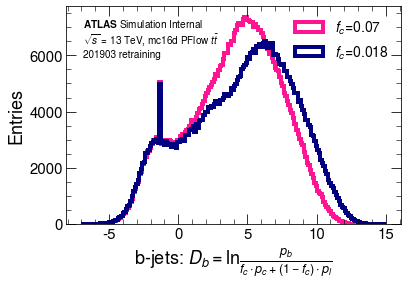

In [111]:
n = 200
r = (-7,15)

plt.hist(d[y==2],n,r,histtype='step',lw=4,color='deeppink',label='$f_c$=0.07')
plt.hist(d_p018[y==2],n,r,histtype='step',lw=4,color='navy',label='$f_c$=0.018')
plt.xlabel(r'b-jets: $D_b = \ln \frac{p_b}{f_c \cdot p_c + (1-f_c) \cdot p_l}$',fontsize=18)
plt.ylabel('Entries',fontsize=18)
plt.legend(loc='upper right')

ax = plt.gca()
plt.text(0.05,.95,text,ha='left',va='top',transform=ax.transAxes,fontsize=10)

plt.savefig(f'{figDir}/Db_fc_p07_p018.pdf',bbox_inches='tight')

In [102]:
for fc, di,c in zip([0.07,0.018],[d,d_p018],wps.columns):
    
    for wp in wps.index:
    
        wps.loc[wp,c] = workingPoint(di[y==2],500,r,0.01*wp,verbose=True)

i_eff = 341, teff = 0.8499210014812552
Cut on discriminant at -0.04800000041723251
i_eff = 309, teff = 0.7703308813211985
Cut on discriminant at 1.3600000143051147
i_eff = 287, teff = 0.6987535536253695
Cut on discriminant at 2.328000068664551
i_eff = 262, teff = 0.5985308658195824
Cut on discriminant at 3.427999973297119
i_eff = 341, teff = 0.8495957597962708
Cut on discriminant at -0.04800000041723251
i_eff = 307, teff = 0.7693736307714969
Cut on discriminant at 1.4479999542236328
i_eff = 283, teff = 0.6996590488499497
Cut on discriminant at 2.503999948501587
i_eff = 253, teff = 0.6008592970726069
Cut on discriminant at 3.8239998817443848


In [107]:
wps

fc = 0.07  fc = 0.018
85     -0.048      -0.048
77      1.360       1.448
70      2.328       2.504
60      3.428       3.824

Let's sanity check the roc curves!!

In [113]:
# for bkg_effs in zip([],[]):
    
#     for bkg_eff, sig_eff,c in zip(bkg_effs,[beff,beff2],['deeppink','navy']):
    
        
    
    